### Imports

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
%matplotlib inline

import torch # to determine if we can do away with it
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
# download/ load the data set
output_dir = "/src/swdb_2023/Day5/data"

# this path determines where downloaded data will be stored
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


### Only interested in brain observatory data

In [3]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
brain_observatory_type_sessions.tail()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."
799864342,2019-10-03T00:00:00Z,772616823,brain_observatory_1.1,129.0,M,wt/wt,604,2233,6,"[APN, POL, LP, DG, CA1, VISrl, nan, LGd, CA3, ..."


### Choose a random session, examine

In [4]:
session_id = 791319847
session = cache.get_session_data(session_id)

In [5]:
# plot number of neurons per region
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

### Look only at drifting gratings stims

In [7]:
session.get_stimulus_table(["drifting_gratings"])

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,0.8,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1590.469172,2.0,drifting_gratings,1592.470862,15.0,2.00169,246
3799,0.8,135.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1593.471657,2.0,drifting_gratings,1595.473327,4.0,2.00167,247
3800,0.8,135.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1596.474152,2.0,drifting_gratings,1598.475832,2.0,2.00168,248
3801,0.8,0.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1599.476677,2.0,drifting_gratings,1601.478347,1.0,2.00167,249
3802,0.8,225.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1602.479182,2.0,drifting_gratings,1604.480862,1.0,2.00168,250
...,...,...,...,...,...,...,...,...,...,...,...,...
49428,0.8,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5388.643497,7.0,drifting_gratings,5390.645187,1.0,2.00169,259
49429,0.8,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5391.646002,7.0,drifting_gratings,5393.647682,4.0,2.00168,270
49430,0.8,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5394.648527,7.0,drifting_gratings,5396.650207,4.0,2.00168,270


### Load spike data, time align to stim onset

In [24]:
presentations = session.get_stimulus_table("drifting_gratings")
# filter out "null trials"
presentations = presentations[presentations.orientation != 'null']
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

### Plot firing rate of each VISp neuron (averaged across stim presentations), aligned on stimulus onset

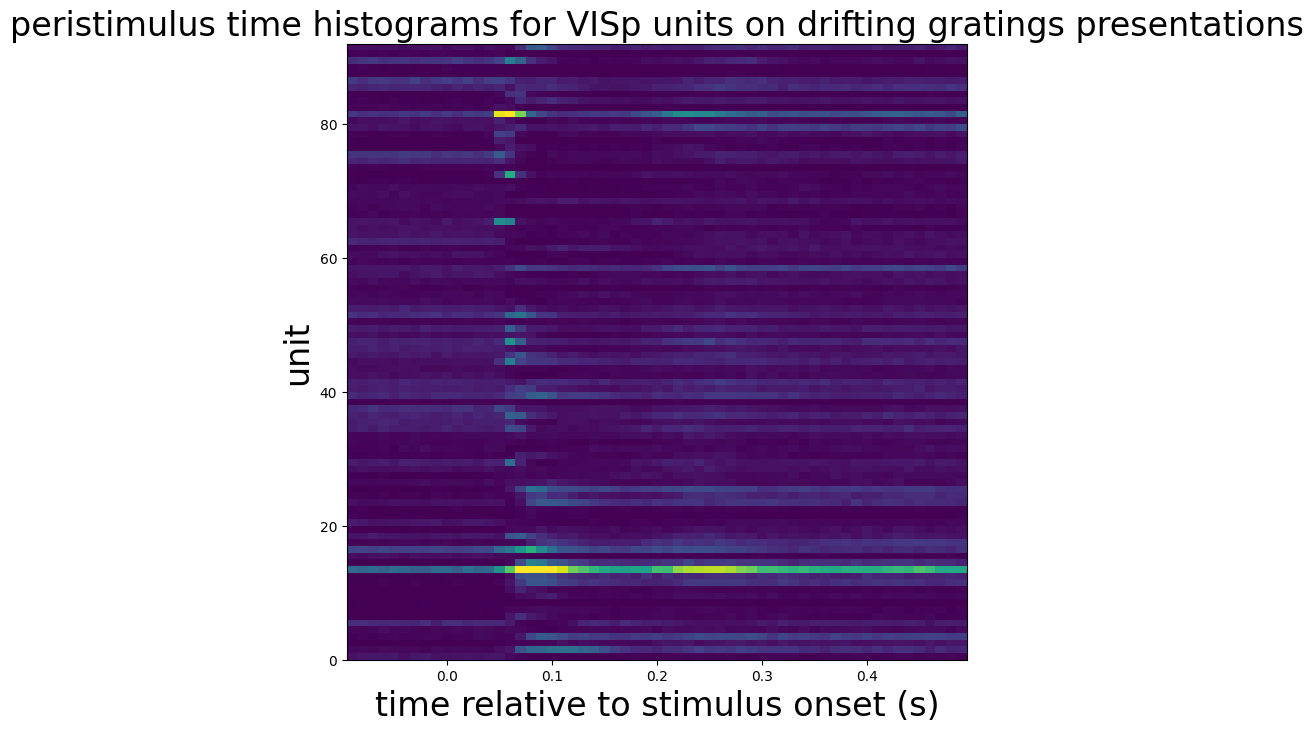

In [25]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on drifting gratings presentations", fontsize=24)

plt.show()

### Look at firing rate of specific neurons, split by grating orientation

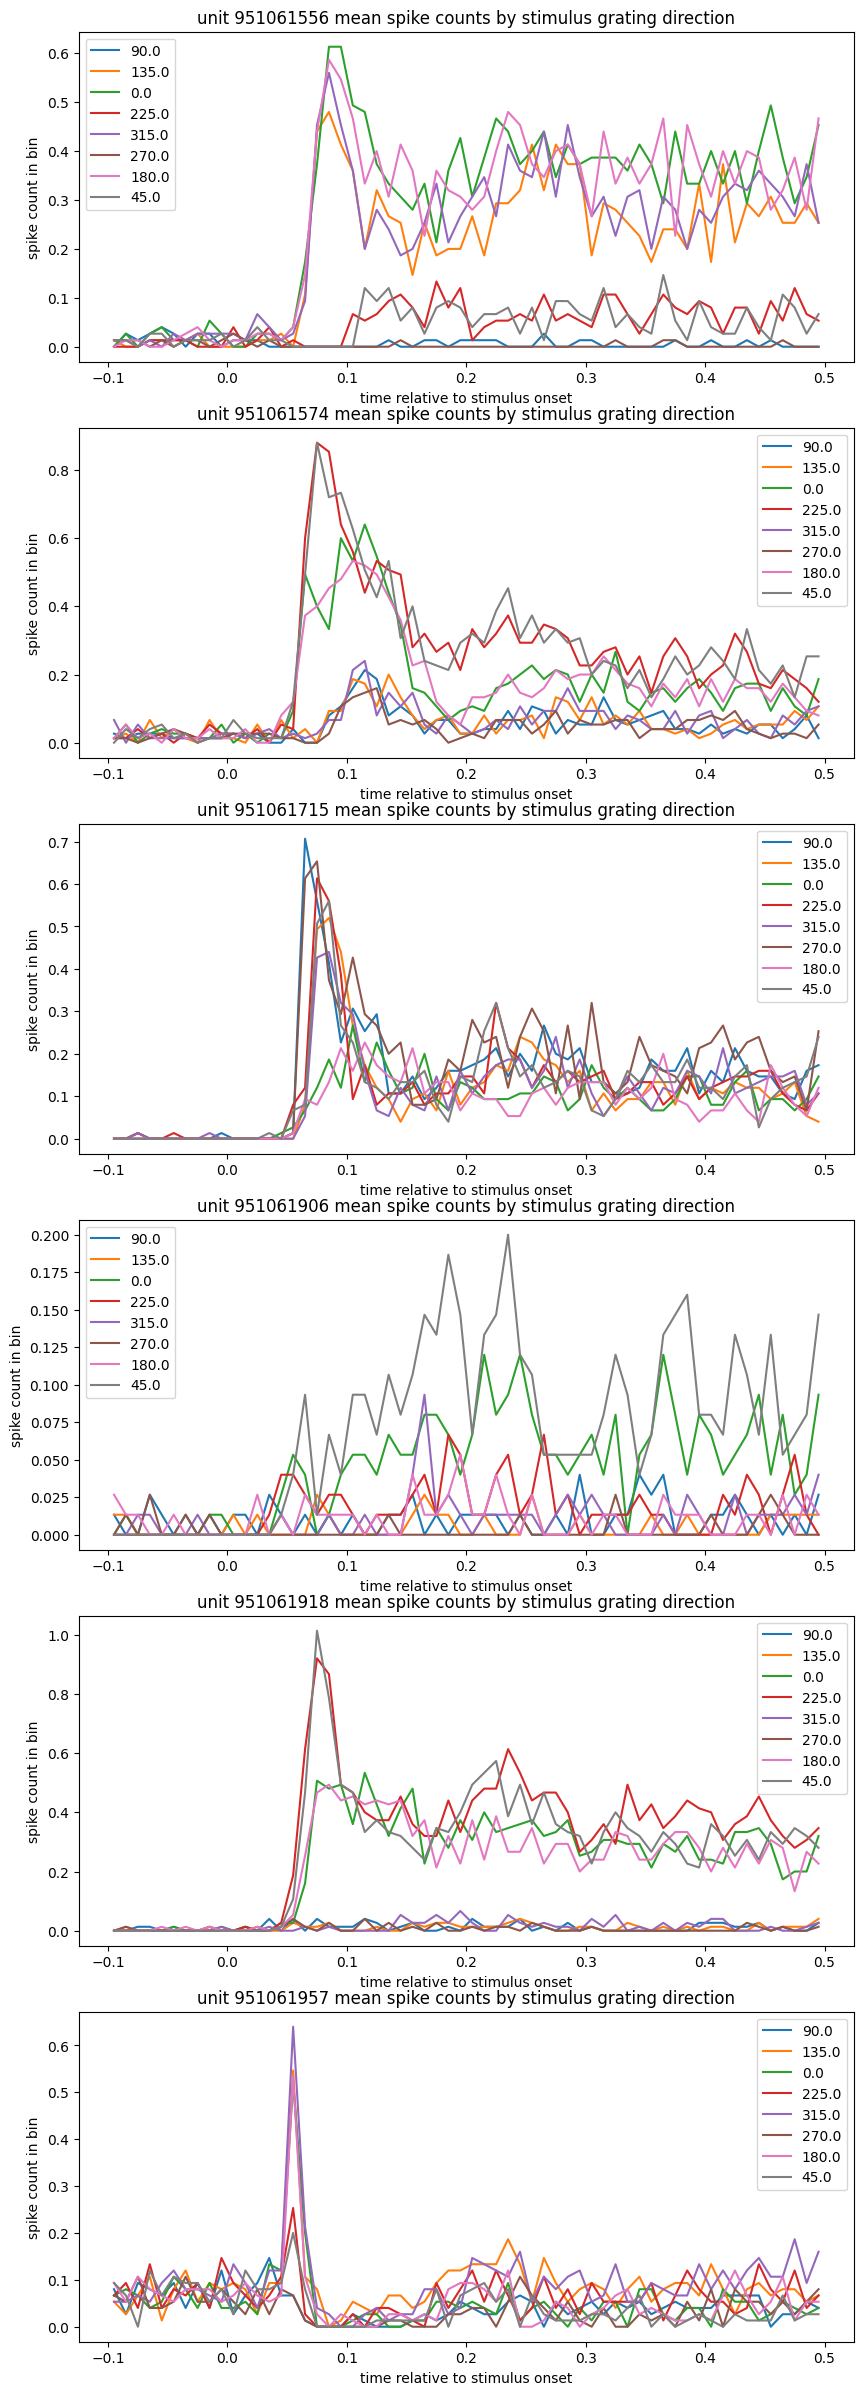

In [26]:
# for each unit, make plots of averaged responses across each orientation, aligned to stim onset

# grab distinct orientations (directions)
orientations = presentations.orientation.unique()

# a list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
fig, ax = plt.subplots(len(interesting_units), 1, figsize=(10, 30))

for i, unit_id in enumerate(interesting_units):
    for orientation in orientations: 
        trial_ids = presentations[presentations.orientation == orientation].index.values        
        data = histograms.loc[trial_ids, :, unit_id]
        mean = data.mean(dim="stimulus_presentation_id")
        ax[i].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
    ax[i].legend()
    ax[i].set_xlabel("time relative to stimulus onset")
    ax[i].set_ylabel("spike count in bin")
    ax[i].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")
